### Analyzing the Stroop Effect
Perform the analysis in the space below. Remember to follow [the instructions](https://docs.google.com/document/d/1-OkpZLjG_kX9J6LIQ5IltsqMzVWjh36QpnP2RYpVdPU/pub?embedded=True) and review the [project rubric](https://review.udacity.com/#!/rubrics/71/view) before submitting. Once you've completed the analysis and write-up, download this file as a PDF or HTML file, upload that PDF/HTML into the workspace here (click on the orange Jupyter icon in the upper left then Upload), then use the Submit Project button at the bottom of this page. This will create a zip file containing both this .ipynb doc and the PDF/HTML doc that will be submitted for your project.


(1) What is the independent variable? What is the dependent variable?

the independent variable is the condition of the words and the dependent variable is the response time 

(2) What is an appropriate set of hypotheses for this task? Specify your null and alternative hypotheses, and clearly define any notation used. Justify your choices.

i = incongruent

c = congruent

H0: μi ≤ μc

H1: μi > uc

the null hypotheses is that the mean congruent time is less than or equial to the mean incongruent and the alternative hypotheses is that the mean congruent time is more than the mean incongruent time. the statistical testI will use is a statistical testtwo tailed t-test with a confidence level of 99%




(3) Report some descriptive statistics regarding this dataset. Include at least one measure of central tendency and at least one measure of variability. The name of the data file is 'stroopdata.csv'.

In [1]:
import math
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import t
%matplotlib inline

In [2]:
df = pd.read_csv("stroopdata.csv")
df.head()

,Congruent,Incongruent
0,12.079,19.278
1,16.791,18.741
2,9.564,21.214
3,8.630,15.687
4,14.669,22.803


In [3]:
df.describe()

,Congruent,Incongruent
count,24.000000,24.000000
mean,14.051125,22.015917
std,3.559358,4.797057
min,8.630000,15.687000
25%,11.895250,18.716750
50%,14.356500,21.017500
75%,16.200750,24.051500
max,22.328000,35.255000


--write answer here--

(4) Provide one or two visualizations that show the distribution of the sample data. Write one or two sentences noting what you observe about the plot or plots.

Text(0,0.5,'frequency')

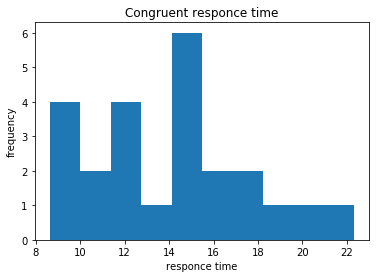

In [4]:
plt.hist(df["Congruent"])
plt.title("Congruent responce time")
plt.xlabel("responce time")
plt.ylabel("frequency")


The congruent historgram is normaly distributed with a middle close to 14 

Text(0,0.5,'frequency')

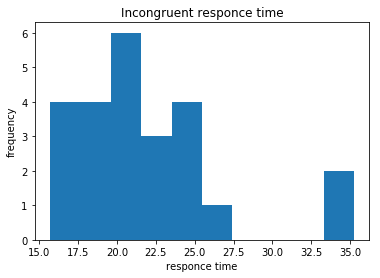

In [5]:
plt.hist(df["Incongruent"])
plt.title("Incongruent responce time")
plt.xlabel("responce time")
plt.ylabel("frequency")


The Incongruent historgram looks to be skewed to the right but the mean and median are close which would indicte a normal distorbution I think this is because of outliers on the higher end  

(5)  Now, perform the statistical test and report your results. What is your confidence level or Type I error associated with your test? What is your conclusion regarding the hypotheses you set up? Did the results match up with your expectations? **Hint:**  Think about what is being measured on each individual, and what statistic best captures how an individual reacts in each environment.

### Two tailed t-test with a confidence level of 99%

In [6]:
#T-critical level
t.ppf(0.99, 24)

2.4921594731575762

In [7]:
#made a differance column 
df["differance"] = df["Congruent"] - df["Incongruent"]
df.head()

,Congruent,Incongruent,differance
0,12.079,19.278,-7.199
1,16.791,18.741,-1.950
2,9.564,21.214,-11.650
3,8.630,15.687,-7.057
4,14.669,22.803,-8.134


In [8]:
#std of the differance column
std_d =df["differance"].std()

In [9]:
#t-value
abs(df["differance"].mean())/(std_d / math.sqrt(24))


8.020706944109957

we reject the null hypothesis as the t-value(8.020706944109957) is larger than the critical level(2.4921594731575762), this is to be expected from previous analysys incongruent times are longer than congruent times on average. 

(6) Optional: What do you think is responsible for the effects observed? Can you think of an alternative or similar task that would result in a similar effect? Some research about the problem will be helpful for thinking about these two questions!

https://en.wikipedia.org/wiki/Stroop_effect#Experimental_findings
quote: 
Theories
There are several theories used to explain the Stroop effect and are commonly known as ‘race models’. This is based on the underlying notion that both relevant and irrelevant information are processed in parallel, but "race" to enter the single central processor during response selection.[13] They are:

Processing speed
This theory suggests there is a lag in the brain's ability to recognize the color of the word since the brain reads words faster than it recognizes colors.[14] This is based on the idea that word processing is significantly faster than color processing. In a condition where there is a conflict regarding words and colors (e.g., Stroop test), if the task is to report the color, the word information arrives at the decision-making stage before the color information which presents processing confusion. Conversely, if the task is to report the word, because color information lags after word information, a decision can be made ahead of the conflicting information.[15]

Selective attention
The Selective Attention Theory suggests that color recognition, as opposed to reading a word, requires more attention. The brain needs to use more attention to recognize a color than to encode a word, so it takes a little longer.[16] The responses lend much to the interference noted in the Stroop task. This may be a result of either an allocation of attention to the responses or to a greater inhibition of distractors that are not appropriate responses.

Automaticity
This theory is the most common theory of the Stroop effect.[17][not in citation given] It suggests that since recognizing colors is not an "automatic process" there is hesitancy to respond; whereas, the brain automatically understands the meaning of words as a result of habitual reading. This idea is based on the premise that automatic reading does not need controlled attention, but still uses enough attentional resources to reduce the amount of attention accessible for color information processing.[18] Stirling (1979) introduced the concept of response automaticity. He demonstrated that changing the responses from colored words to letters that were not part of the colored words increased reaction time while reducing Stroop interference.[19]

Parallel distributed processing
This theory suggests that as the brain analyzes information, different and specific pathways are developed for different tasks.[20] Some pathways, such as reading, are stronger than others, therefore, it is the strength of the pathway and not the speed of the pathway that is important.[17] In addition, automaticity is a function of the strength of each pathway, hence, when two pathways are activated simultaneously in the Stroop effect, interference occurs between the stronger (word reading) path and the weaker (color naming) path, more specifically when the pathway that leads to the response is the weaker pathway.[21]